In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.1.0+cu121
2.7.13


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxmaniyozov","key":"7a1b92ba5e3828165b7a8e06ff017363"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c pnevmoniya

 99% 1.13G/1.14G [00:13<00:00, 26.1MB/s]
100% 1.14G/1.14G [00:13<00:00, 90.0MB/s]


In [ ]:
!ls

kaggle.json  pnevmoniya.zip  sample_data


In [ ]:
from zipfile import ZipFile
dataset = "/content/pnevmoniya.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = db.dataloaders(path)
# dls.train.show_batch(max_n=32, nrows=4)

#training
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.493843,0.305737,0.913710,01:52


epoch,train_loss,valid_loss,accuracy,time
0,0.207656,0.169896,0.958773,01:55
1,0.138552,0.109080,0.968360,01:58
2,0.084395,0.112181,0.970278,01:55
3,0.056452,0.100767,0.972196,01:57


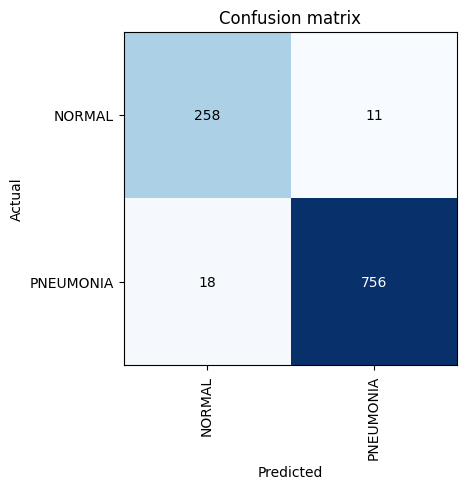

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# interp.plot_top_losses(2, nrows=1)

In [ ]:
import os
from PIL import Image
import numpy as np

path = Path('test')

#create a list of all images in the test folder
images = [os.path.join(path, f) for f in os.listdir(path)]

In [ ]:
predictions = []
for i in images:
  pred, pred_id, _ = learn.predict(i)
  predictions.append(pred)

In [ ]:
import pandas as pd

df1 = pd.DataFrame(images)
df2 = pd.DataFrame(predictions)
df = pd.concat([df1, df2], axis=1)

In [ ]:
df.to_csv('/content/predictions.csv')

In [ ]:
# import joblib
# joblib.dump(learn, 'pnevmaniya.pkl')